In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder



In [4]:
# Load data
df = pd.read_csv(r"D:/Taxi Fuel and Cost Optimization using Data Science/taluka_distance_data.csv")

In [5]:
# Step 1: Preprocess and clean data
df.dropna(inplace=True)  # Remove any missing values


In [6]:
# Step 2: Normalize fuel cost per km
df['cost_per_km'] = df['fuel_cost_inr'] / df['distance_km']

In [7]:
# Step 3: Find most fuel-efficient route for each pickup-dropoff pair
optimal_routes = df.loc[df.groupby(['pickup_location', 'dropoff_location'])['cost_per_km'].idxmin()]


C:\Users\DELL\AppData\Local\Temp\ipykernel_6308\1040670024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel_type', y='cost_per_km', data=df, palette='Set2')


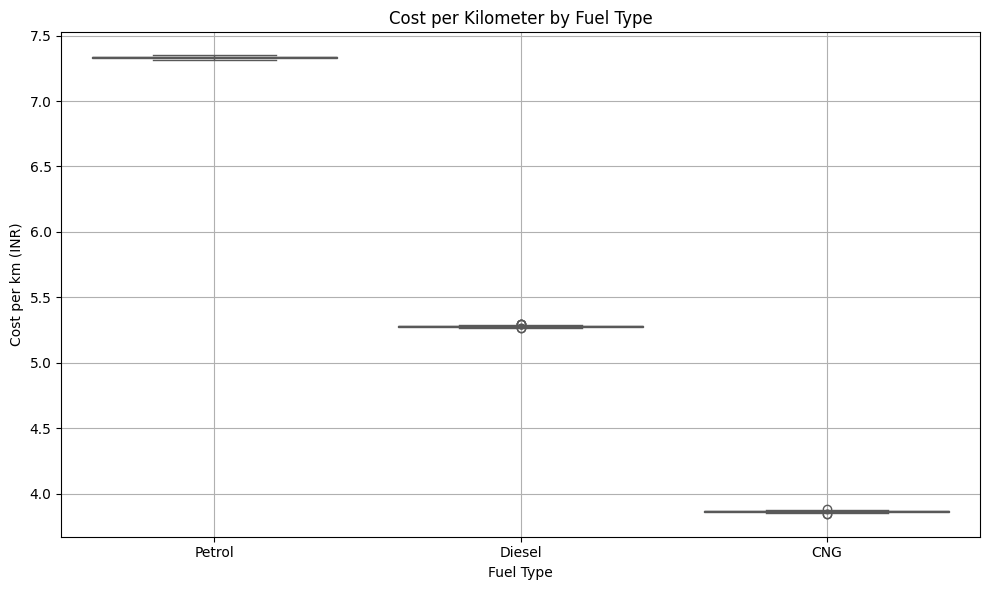

In [8]:
# Step 4: Visualizations

# A. Cost per Kilometer by Fuel Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='cost_per_km', data=df, palette='Set2')
plt.title('Cost per Kilometer by Fuel Type')
plt.ylabel('Cost per km (INR)')
plt.xlabel('Fuel Type')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_6308\1620519711.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fuel_type', y='cost_per_km', hue='traffic', data=df, ci=None, palette='pastel')


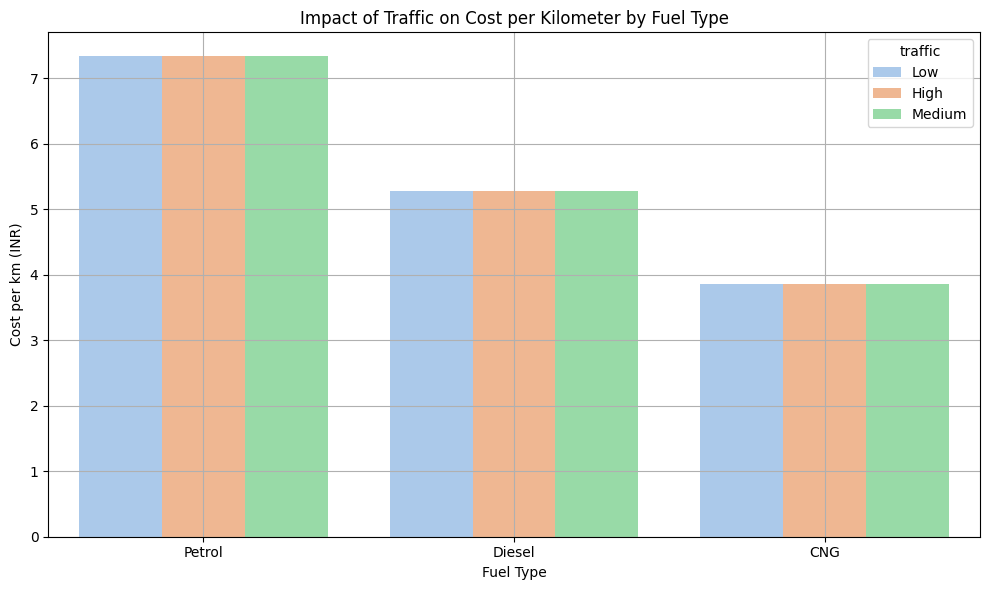

In [9]:
# B. Traffic Impact on Cost per km by Fuel Type
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_type', y='cost_per_km', hue='traffic', data=df, ci=None, palette='pastel')
plt.title('Impact of Traffic on Cost per Kilometer by Fuel Type')
plt.ylabel('Cost per km (INR)')
plt.xlabel('Fuel Type')
plt.grid(True)
plt.tight_layout()
plt.show()

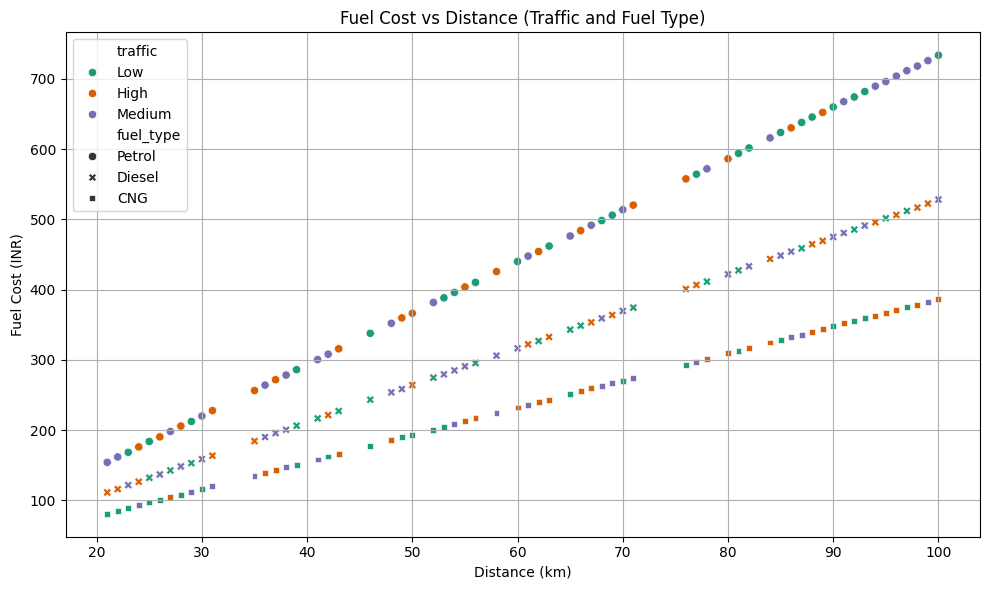

In [10]:
# C. Fuel Cost vs Distance (with traffic and fuel type)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_km', y='fuel_cost_inr', hue='traffic', style='fuel_type', data=df, palette='Dark2')
plt.title('Fuel Cost vs Distance (Traffic and Fuel Type)')
plt.xlabel('Distance (km)')
plt.ylabel('Fuel Cost (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Step 5: Summary of Optimal Routes
print("Top 10 Optimal Routes (Minimum Cost per KM):")
print(optimal_routes[['pickup_location', 'dropoff_location', 'fuel_type', 'traffic', 'cost_per_km', 'fuel_cost_inr']].head(10))


Top 10 Optimal Routes (Minimum Cost per KM):
    pickup_location       dropoff_location fuel_type traffic  cost_per_km  \
131        Ambegaon               Baramati       CNG     Low     3.853333   
137        Ambegaon                   Bhor       CNG     Low     3.845238   
125        Ambegaon                  Daund       CNG    High     3.865476   
128        Ambegaon                Indapur       CNG    High     3.859694   
119        Ambegaon                 Junnar       CNG    High     3.870536   
146        Ambegaon                  Maval       CNG  Medium     3.863636   
143        Ambegaon                 Mulshi       CNG     Low     3.857692   
149        Ambegaon  Pimpri-Chinchwad City       CNG    High     3.861429   
134        Ambegaon               Purandar       CNG     Low     3.861728   
122        Ambegaon                 Shirur       CNG     Low     3.855357   

     fuel_cost_inr  
131         115.60  
137          80.75  
125         324.70  
128         378.25  
11

In [12]:
# Step 6: Predicting Fuel Cost using Linear Regression (basic ML model)
# Encoding categorical variables
encoded_df = df.copy()
le_fuel = LabelEncoder()
le_traffic = LabelEncoder()
encoded_df['fuel_type'] = le_fuel.fit_transform(encoded_df['fuel_type'])
encoded_df['traffic'] = le_traffic.fit_transform(encoded_df['traffic'])


In [13]:
# Define features and target
X = encoded_df[['distance_km', 'fuel_type', 'traffic']]
y = encoded_df['fuel_cost_inr']

In [14]:
# Train regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [15]:
# Predict fuel cost for example input
example_input = pd.DataFrame({
    'distance_km': [50],
    'fuel_type': [le_fuel.transform(['CNG'])[0]],
    'traffic': [le_traffic.transform(['High'])[0]]
})
predicted_cost = model.predict(example_input)[0]
print(f"\nPredicted fuel cost for 50 km, CNG, High Traffic: ₹{predicted_cost:.2f}")


Predicted fuel cost for 50 km, CNG, High Traffic: ₹164.62
